In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import shap
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
import shap
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

In [3]:
features = pd.read_csv("data/X_cleaned.csv")
output = pd.read_csv("data/y_cleaned.csv")

In [4]:
independent = pd.DataFrame(features)
dependent = pd.DataFrame(output)

In [5]:
df = pd.concat([independent, dependent], axis=1)

In [6]:
df.head()
# df.info()
# df.describe()

,agemon1,female1,stunting1,underweight1,bcg1,measles1,tetanus1,has_longterm_disease_r1,bmi1,careage1,...,bmi5,stunting5,thinness5,chhealth5,z_selfefficacy_r5,z_agency_r5,z_selfsteem_r5,z_peersr5,z_pride_r5,z_relationparents_r5
0,7,0.0,0,0,1,0,1,0,14.922146,30,...,14.497697,1,2,2,-0.902831,0.405940,-0.593782,-0.197115,1.015500,-1.140962
1,14,0.0,0,0,1,1,1,0,15.547168,25,...,19.965398,0,0,2,-0.666351,-0.233022,0.613296,0.430333,-1.787409,-1.616397
2,11,1.0,0,0,1,1,0,0,15.734185,30,...,17.469445,0,0,2,0.862961,1.068327,-0.134186,0.713549,0.292409,-0.155111
3,12,1.0,0,0,1,1,1,0,15.627442,36,...,19.086428,1,0,2,-1.244954,1.017076,-0.926815,-0.699221,-1.034115,0.147575
4,16,1.0,0,0,1,1,1,0,15.591147,28,...,21.771661,0,0,2,0.383515,0.405940,0.299607,-0.197115,-0.407526,0.421651


In [7]:
independent_vars = ["agemon1", "female1", "stunting1", "underweight1", "bcg1", "measles1", "tetanus1", "has_longterm_disease_r1", "bmi1","careage1", "carecantread1", "caredu1", "caregiver_is_female1", "caregiver_is_parent1", "dadage1", "dadedu1", "dadlive1", "momage1", "momedu1", "momlive1", "numante1", "hhsize1", "headage1", "headedu1", "headsex1", "ownlandhse1", "typesite1", "cookingq1", "drwaterq1", "elecq1", "toiletq1", "aniany1", "sv1", "injury_child_may_die_r1", "sees_dad_daily_r1", "sees_mom_daily_r1", "health_worse_than_others_r1"]
dependent_vars = ['bmi5', 'stunting5', 'thinness5', 'chhealth5', 'z_selfefficacy_r5', 'z_agency_r5', 'z_selfsteem_r5', 'z_peersr5', 'z_pride_r5', 'z_relationparents_r5']

In [8]:
X = df[independent_vars]
y = df[dependent_vars]

In [9]:
X["dadlive1"]

0       1
1       1
2       1
3       1
4       1
       ..
1187    1
1188    1
1189    1
1190    1
1191    1
Name: dadlive1, Length: 1192, dtype: int64

In [10]:
df.corr()

,agemon1,female1,stunting1,underweight1,bcg1,measles1,tetanus1,has_longterm_disease_r1,bmi1,careage1,...,bmi5,stunting5,thinness5,chhealth5,z_selfefficacy_r5,z_agency_r5,z_selfsteem_r5,z_peersr5,z_pride_r5,z_relationparents_r5
agemon1,1.000000,-0.021999,0.093562,0.066362,0.002260,0.580566,0.002915,0.038465,-0.272698,0.076806,...,0.064095,0.006802,-0.051362,0.008474,0.020841,-0.018696,0.015273,0.031330,0.016335,0.032961
female1,-0.021999,1.000000,-0.054842,-0.061246,0.011653,0.010595,-0.031940,-0.005797,-0.160186,0.040812,...,0.009820,0.009027,-0.092601,-0.075486,0.061466,0.118364,0.007391,0.025545,0.016195,0.062241
stunting1,0.093562,-0.054842,1.000000,0.639174,-0.086250,0.047752,-0.089818,0.009182,-0.062555,-0.034431,...,-0.098003,0.356853,0.049507,-0.019971,-0.076048,-0.069800,-0.066107,-0.081664,-0.037657,-0.076386
underweight1,0.066362,-0.061246,0.639174,1.000000,-0.056225,0.039212,-0.048854,0.057093,-0.359746,-0.009775,...,-0.157189,0.272311,0.133681,-0.069874,0.004589,-0.014243,-0.028563,-0.030714,0.010995,-0.031141
bcg1,0.002260,0.011653,-0.086250,-0.056225,1.000000,0.067759,0.142927,-0.005353,-0.006306,0.101435,...,0.036671,-0.050851,-0.003340,0.037015,0.053744,0.019402,0.024808,0.040908,0.073996,0.048224
measles1,0.580566,0.010595,0.047752,0.039212,0.067759,1.000000,0.059254,0.025803,-0.196385,0.063237,...,0.049659,-0.049180,-0.035910,-0.001904,-0.010535,0.015260,-0.015499,0.018734,0.021987,0.073988
tetanus1,0.002915,-0.031940,-0.089818,-0.048854,0.142927,0.059254,1.000000,0.007919,-0.032148,-0.017084,...,-0.016811,0.012529,0.041240,-0.028306,-0.002291,0.001041,-0.017512,-0.028270,0.012639,0.021030
has_longterm_disease_r1,0.038465,-0.005797,0.009182,0.057093,-0.005353,0.025803,0.007919,1.000000,-0.062641,0.028334,...,0.007223,0.005145,0.017329,-0.026766,0.017189,0.036081,-0.005173,0.035589,0.038655,0.002690
bmi1,-0.272698,-0.160186,-0.062555,-0.359746,-0.006306,-0.196385,-0.032148,-0.062641,1.000000,-0.059409,...,0.290571,-0.011438,-0.155520,0.108877,-0.070706,-0.019783,-0.021093,-0.027898,-0.041941,-0.041678
careage1,0.076806,0.040812,-0.034431,-0.009775,0.101435,0.063237,-0.017084,0.028334,-0.059409,1.000000,...,0.036049,-0.042006,0.057177,-0.036661,0.004694,0.004679,-0.029123,-0.027257,0.047882,0.044461


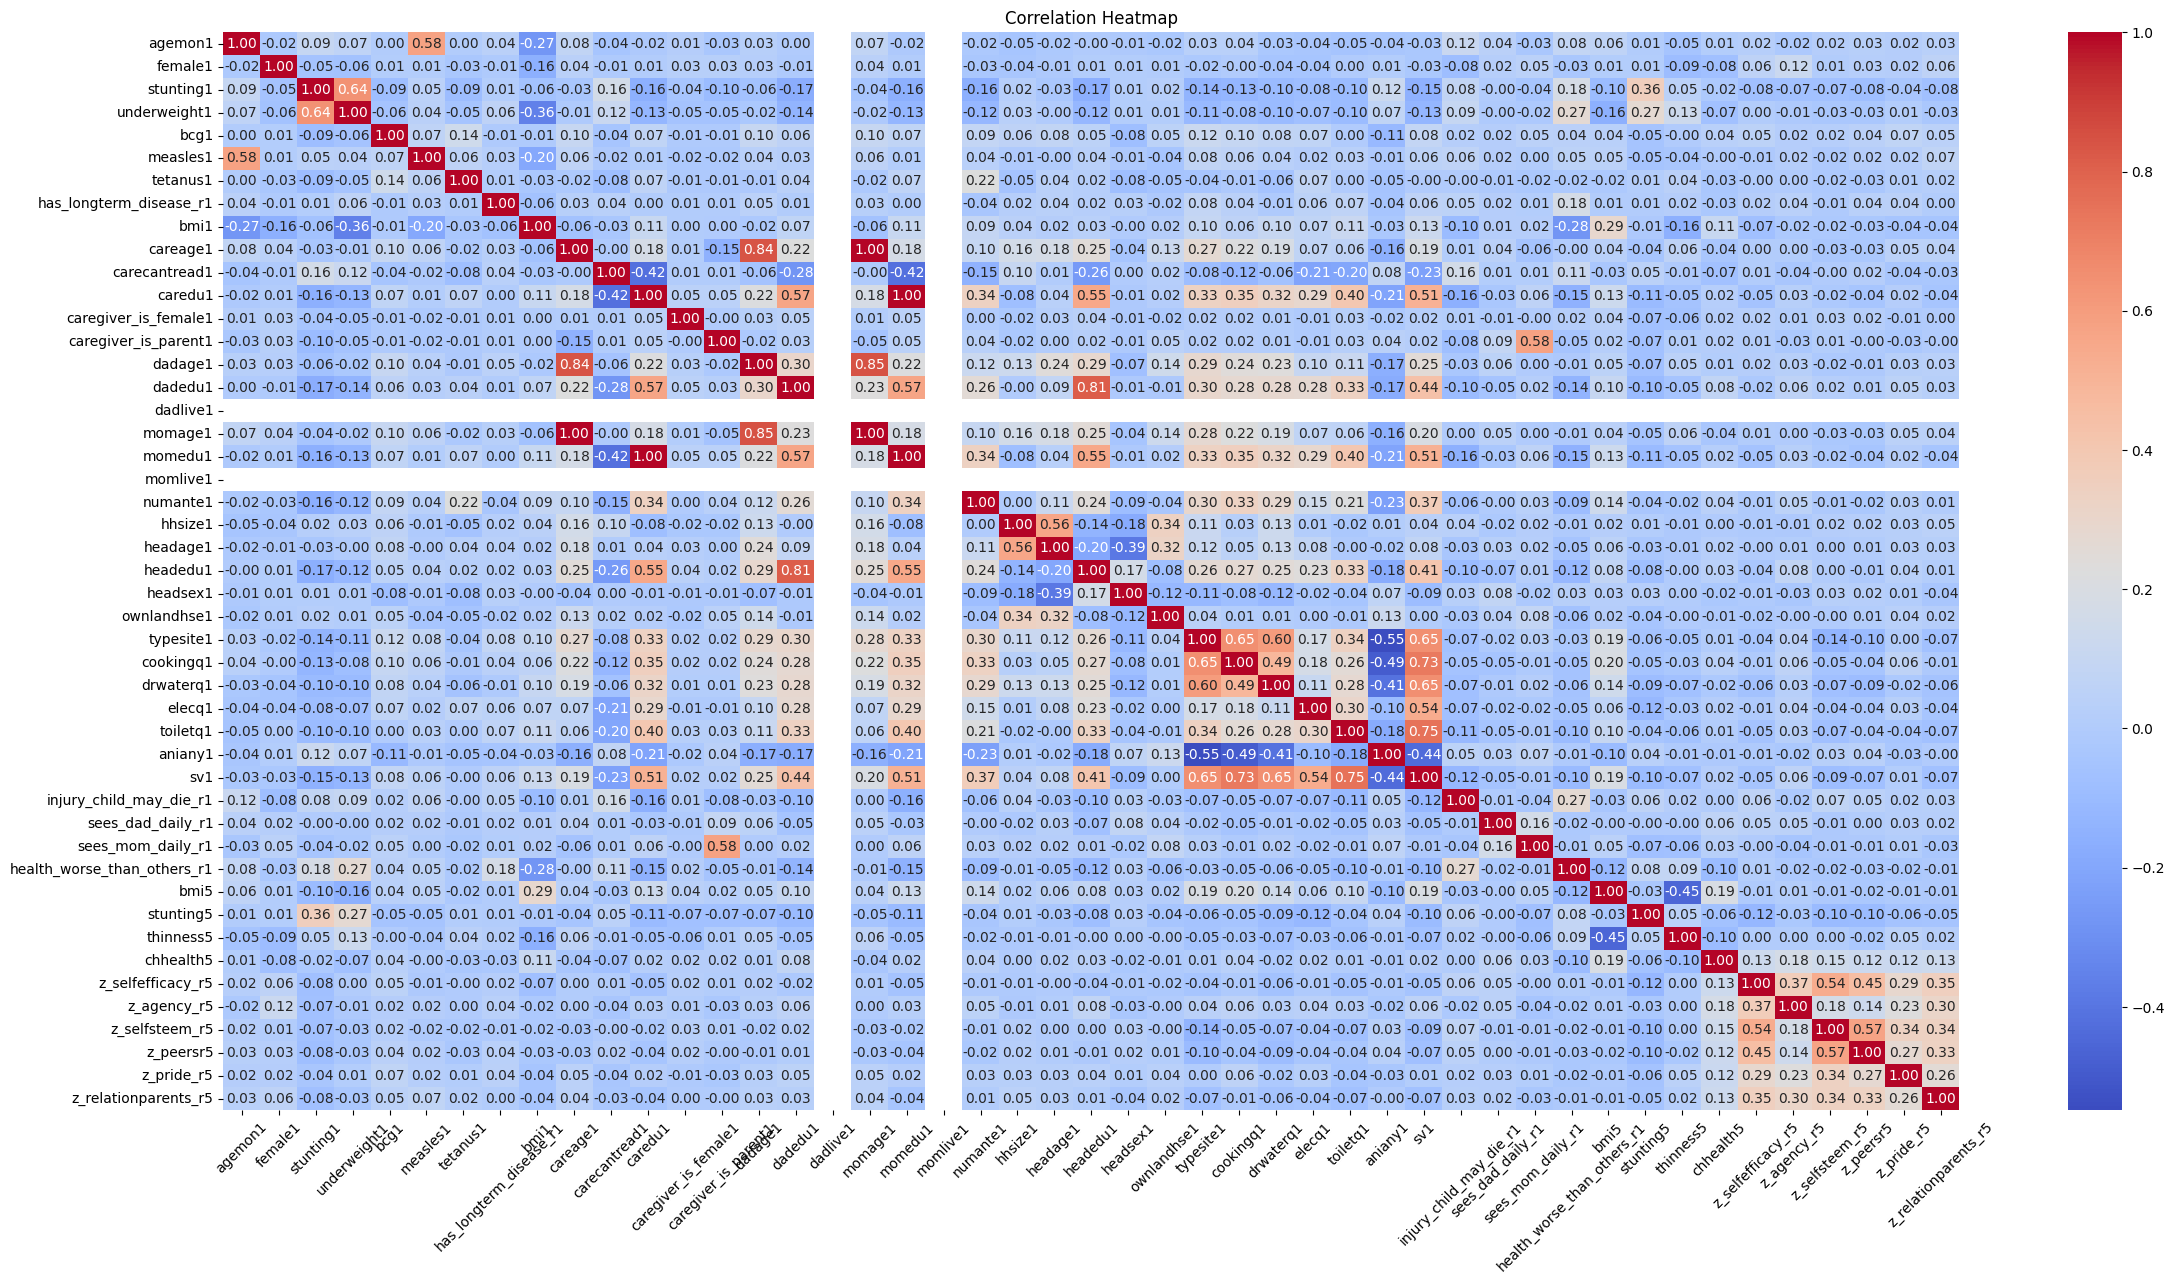

In [11]:
corr_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(28, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Scale

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
print("X shape:", X_scaled.shape)
print("y shape:", y.shape)

X shape: (1192, 37)
y shape: (1192, 10)


# PCA

In [14]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Number of PCA components:", pca.n_components_)
print("Explained variance ratio:", sum(pca.explained_variance_ratio_))
X_pca.shape

Number of PCA components: 26
Explained variance ratio: 0.9534282360023175


(1192, 26)

Text(0, 0.5, 'Cumulative Explained Variance')

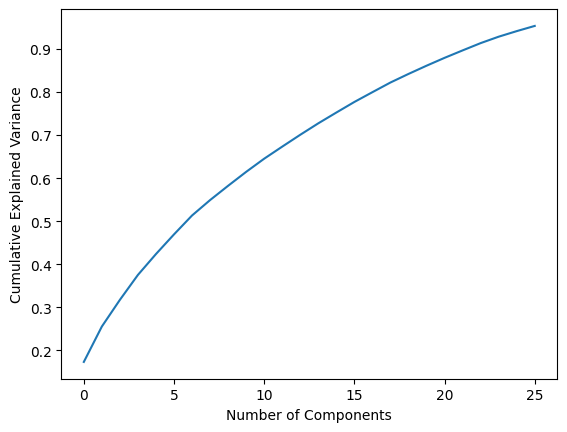

In [15]:
# Plot explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [45]:
# cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# print("Cumulative variance at 15 components:", cumulative_variance[21])

Cumulative variance at 15 components: 0.8965622590919641


Should I reduce more components?


# Split the data: 80% train, 20% test

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (953, 26)
Testing set shape: (239, 26)


In [17]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32) 

# Apply NN by using pytorch

In [18]:
# Create datasets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [19]:
class MultiOutputNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(MultiOutputNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)  # Input layer to 1st hidden
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 32)          # 2nd hidden layer
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(32, output_size)  # Output layer

    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.relu2(self.layer2(x))
        x = self.output_layer(x)
        return x

In [20]:
input_size = X_train.shape[1]  # Number of PCA components
output_size = y_train.shape[1]  # 10 outputs
model = MultiOutputNN(input_size, output_size)

In [21]:
# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [22]:
# Training settings
num_epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Lists to store losses
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set to training mode
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update weights
        
        running_loss += loss.item() * X_batch.size(0)
    
    # Average training loss
    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    
    # Validation loss (using test set as proxy; ideally use a separate validation set)
    model.eval()  # Set to evaluation mode
    val_loss = 0.0
    with torch.no_grad():  # No gradient computation
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            val_loss += criterion(outputs, y_batch).item() * X_batch.size(0)
    val_loss /= len(test_loader.dataset)
    val_losses.append(val_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}")

Epoch 1/100, Train Loss: 37.3725, Val Loss: 36.7620
Epoch 2/100, Train Loss: 31.4952, Val Loss: 28.0662
Epoch 3/100, Train Loss: 20.4480, Val Loss: 14.6392
Epoch 4/100, Train Loss: 8.3704, Val Loss: 5.0215
Epoch 5/100, Train Loss: 3.1945, Val Loss: 2.8300
Epoch 6/100, Train Loss: 2.2057, Val Loss: 2.3155
Epoch 7/100, Train Loss: 1.9258, Val Loss: 2.1668
Epoch 8/100, Train Loss: 1.8210, Val Loss: 2.1038
Epoch 9/100, Train Loss: 1.7657, Val Loss: 2.0726
Epoch 10/100, Train Loss: 1.7226, Val Loss: 2.0137
Epoch 11/100, Train Loss: 1.6833, Val Loss: 2.0102
Epoch 12/100, Train Loss: 1.6539, Val Loss: 1.9576
Epoch 13/100, Train Loss: 1.6183, Val Loss: 1.9401
Epoch 14/100, Train Loss: 1.5992, Val Loss: 1.9143
Epoch 15/100, Train Loss: 1.5662, Val Loss: 1.9033
Epoch 16/100, Train Loss: 1.5485, Val Loss: 1.8697
Epoch 17/100, Train Loss: 1.5243, Val Loss: 1.8743
Epoch 18/100, Train Loss: 1.5052, Val Loss: 1.8596
Epoch 19/100, Train Loss: 1.4855, Val Loss: 1.8407
Epoch 20/100, Train Loss: 1.4751, 

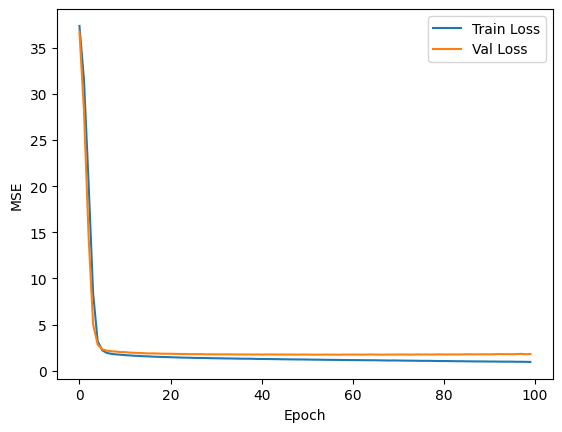

In [23]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [24]:
# evaluate the trained model on the test dataset
model.eval()
test_loss = 0.0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        test_loss += criterion(outputs, y_batch).item() * X_batch.size(0)
test_loss /= len(test_loader.dataset)
print(f"Test Loss (MSE): {test_loss}")

Test Loss (MSE): 1.8106663506400136


In [25]:
y_min = y.min()
y_max = y.max()
y_range = y_max - y_min
print(f"Target range: {y_range}")

Target range: bmi5                    22.121308
stunting5                2.000000
thinness5                2.000000
chhealth5                4.000000
z_selfefficacy_r5        7.465645
z_agency_r5              5.896859
z_selfsteem_r5           8.364099
z_peersr5                8.365849
z_pride_r5               7.148560
z_relationparents_r5     7.286354
dtype: float64


In [26]:
print(f"Final Training Loss: {train_losses[-1]}")
print(f"Final Validation Loss: {val_losses[-1]}")
print(f"Test Loss: {test_loss}")

Final Training Loss: 0.9479663029297452
Final Validation Loss: 1.8106663506400136
Test Loss: 1.8106663506400136


In [28]:
#evaluate the model's performance on the test dataset
y_pred = []
y_true = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch).cpu().numpy()
        y_pred.append(outputs)
        y_true.append(y_batch.numpy())
y_pred = np.concatenate(y_pred, axis=0)
y_true = np.concatenate(y_true, axis=0)

mse_per_output = np.mean((y_true - y_pred) ** 2, axis=0)
for i, var in enumerate(dependent_vars):
    print(f"MSE for {var}: {mse_per_output[i]}")

MSE for bmi5: 10.903877258300781
MSE for stunting5: 0.10289217531681061
MSE for thinness5: 0.16133816540241241
MSE for chhealth5: 0.38188987970352173
MSE for z_selfefficacy_r5: 1.169826865196228
MSE for z_agency_r5: 1.001837134361267
MSE for z_selfsteem_r5: 1.0664939880371094
MSE for z_peersr5: 1.265259861946106
MSE for z_pride_r5: 0.8632609844207764
MSE for z_relationparents_r5: 1.189986228942871


good performance: stunting5 (0.1029) and thinness5 (0.1613)
moderate performance: chhealth5 (0.3819) and z_pride_r5 (0.8633)



# SHapley Additive exPlanations using SHAP

Using 953 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 239/239 [01:55<00:00,  2.06it/s]


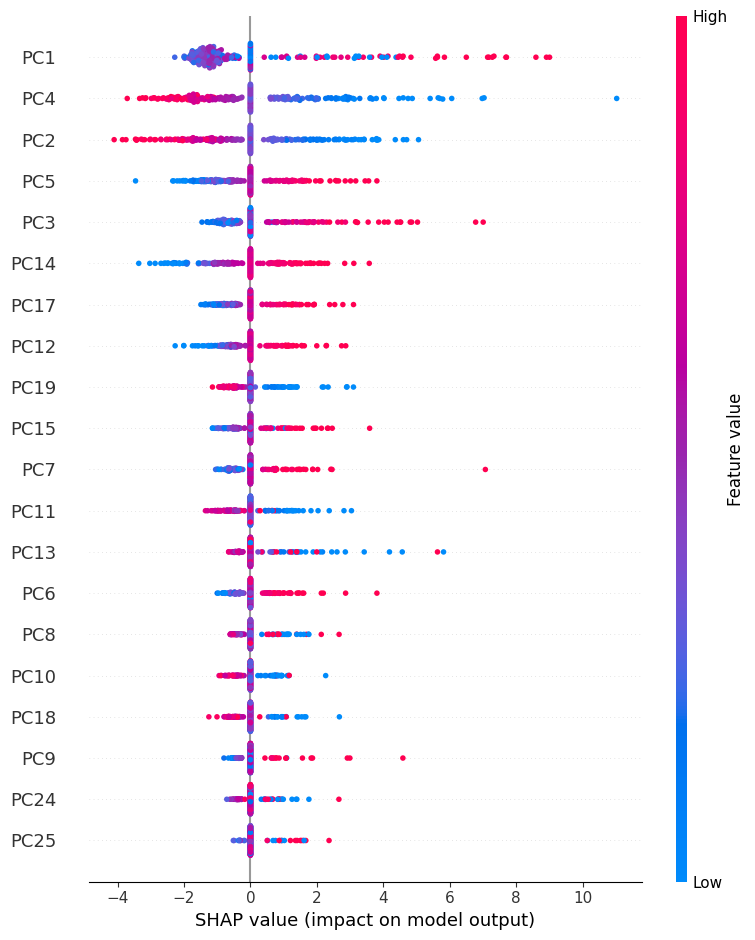

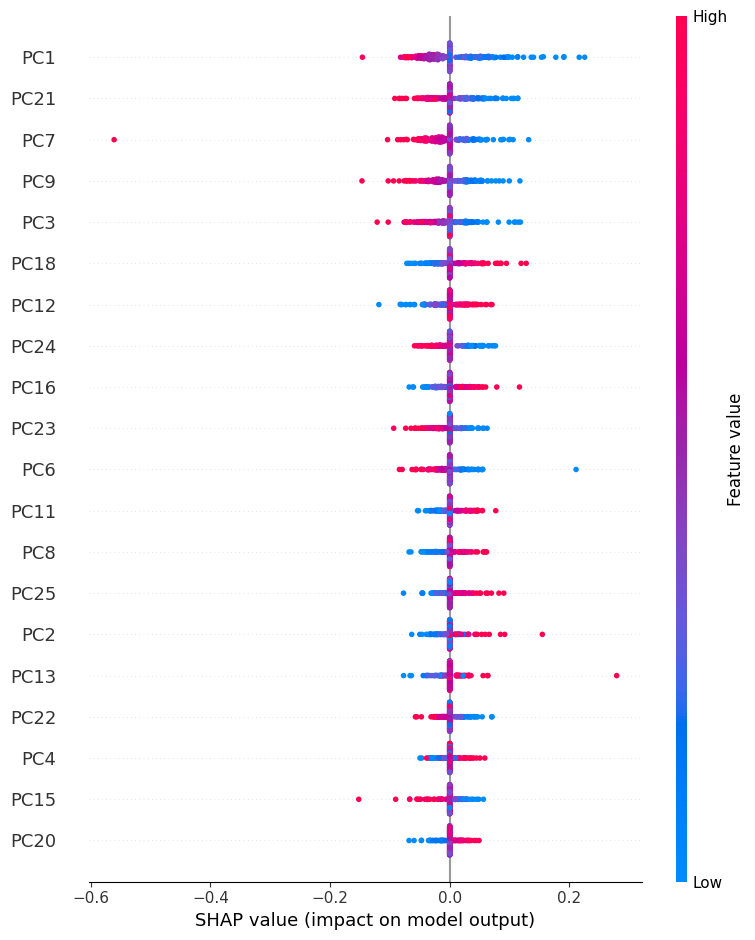

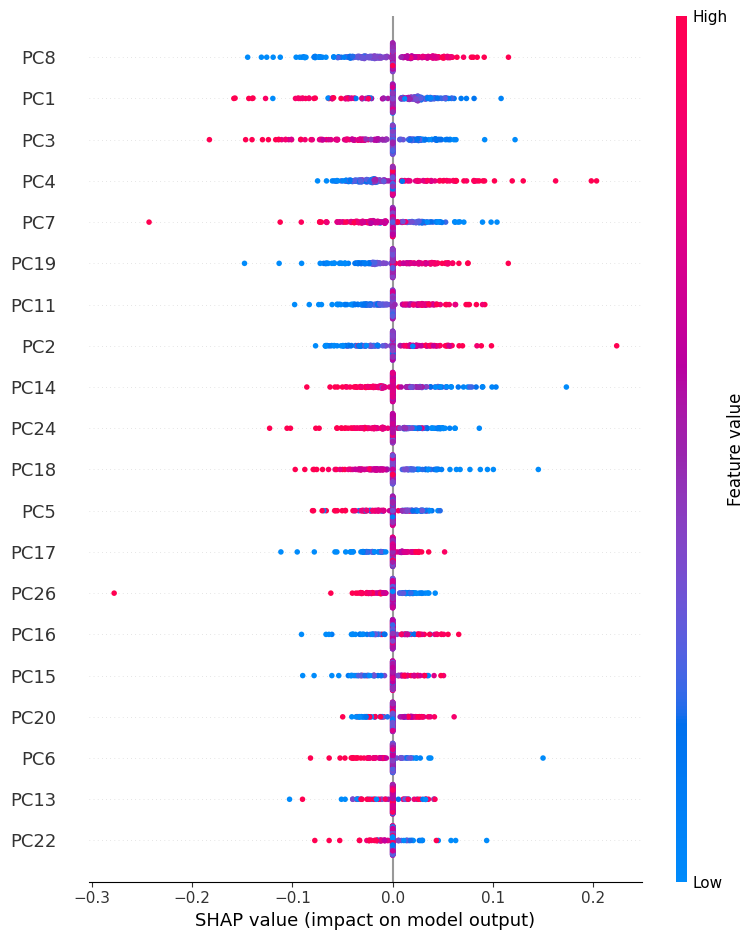

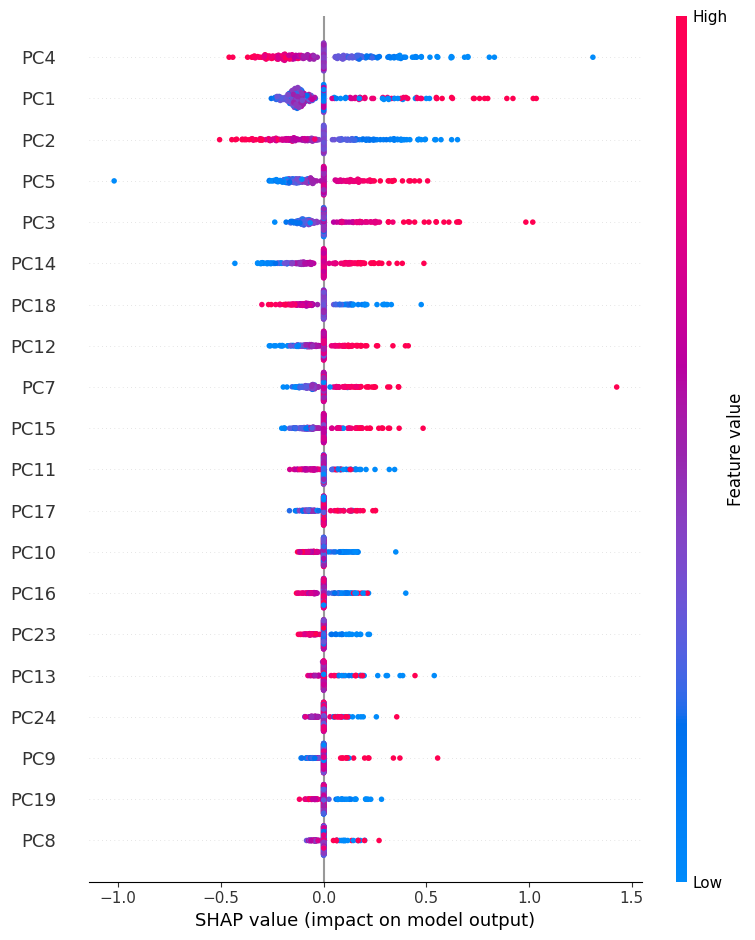

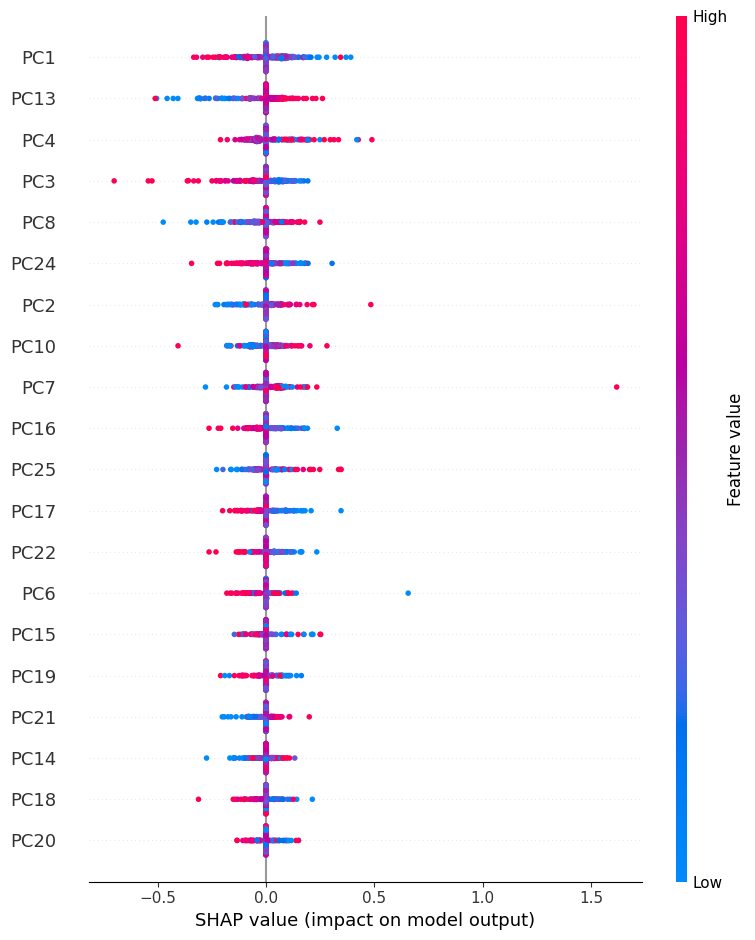

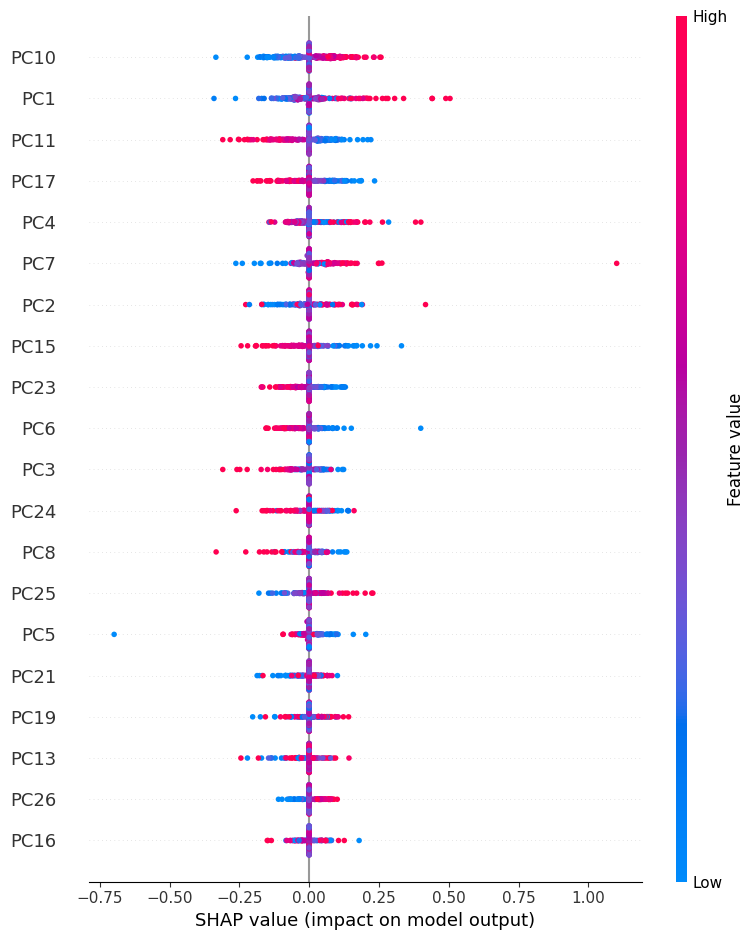

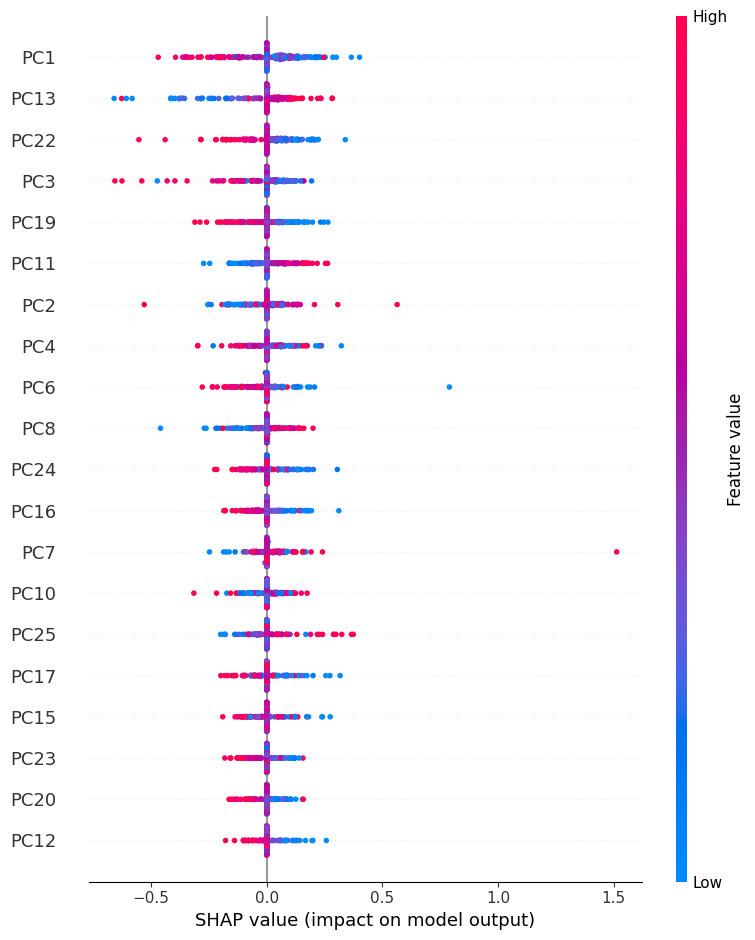

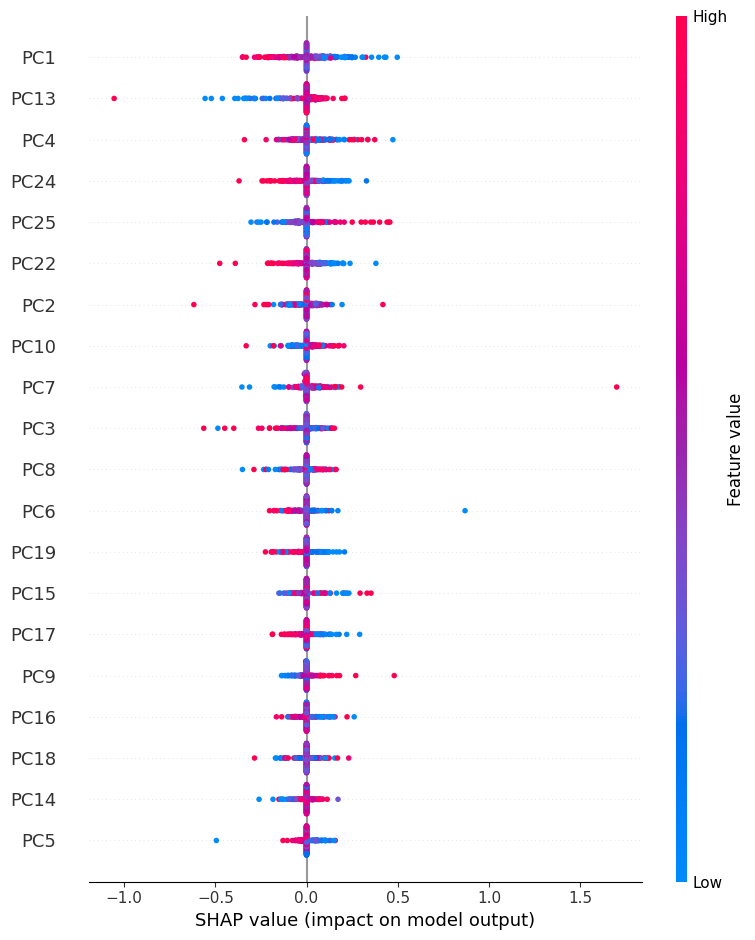

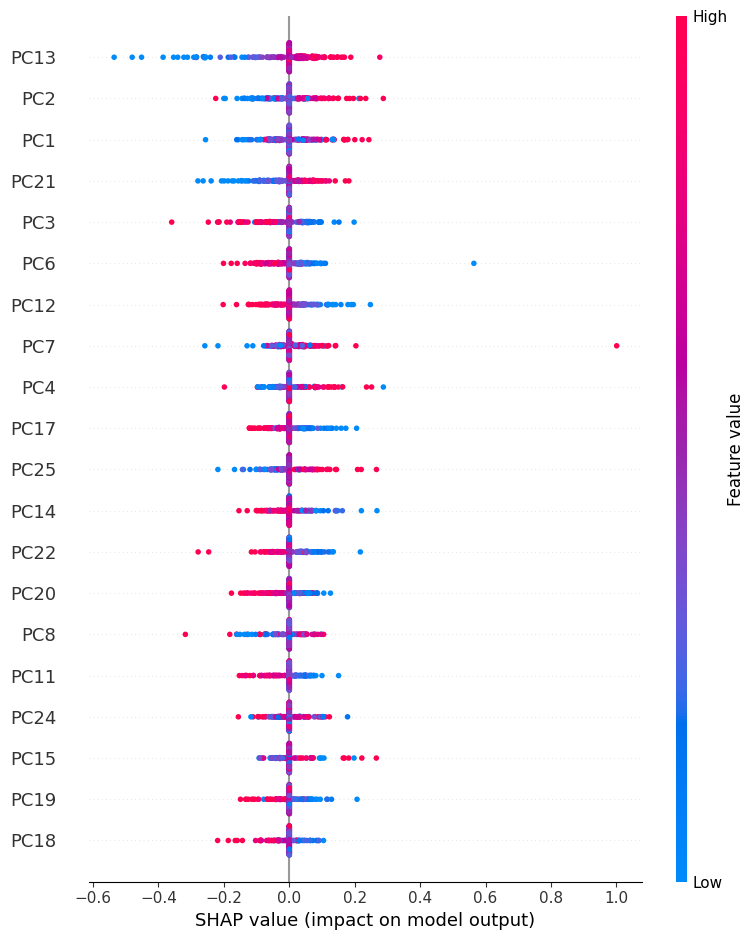

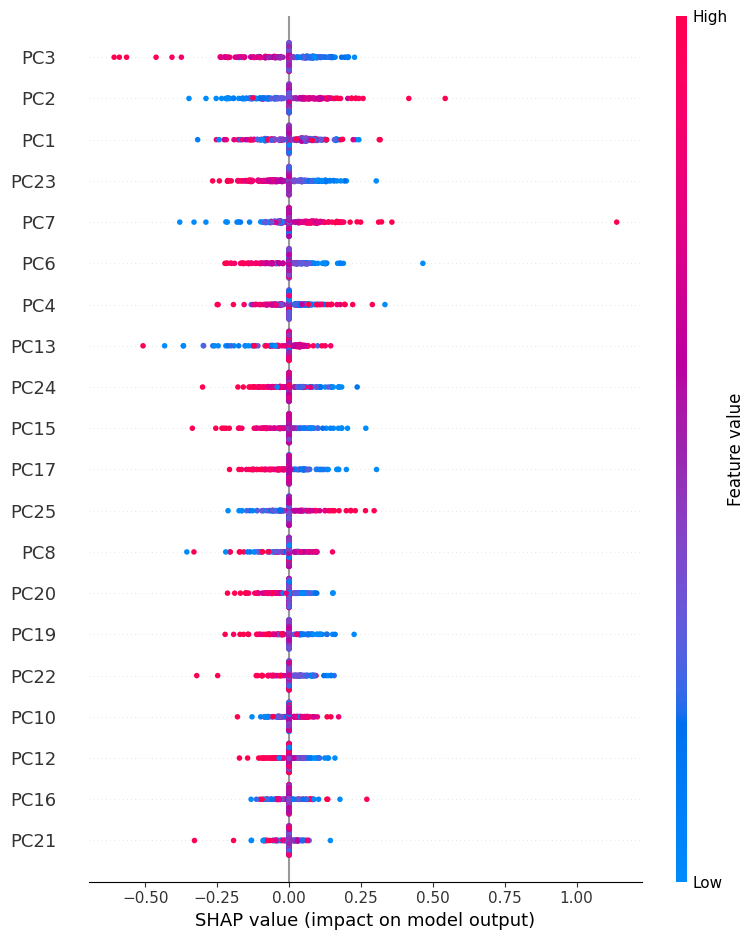

In [31]:
import shap

# Function for SHAP
def model_predict(x):
    model.eval()
    with torch.no_grad():
        x_tensor = torch.tensor(x, dtype=torch.float32).to(device)
        return model(x_tensor).cpu().numpy()

explainer = shap.KernelExplainer(model_predict, X_train.numpy())
shap_values = explainer.shap_values(X_test.numpy())

# Non-cognitive skills (indices 4-9)
for i in range(10):
    shap.summary_plot(shap_values[:, :, i], X_test.numpy(), feature_names=[f'PC{j+1}' for j in range(X_test.shape[1])])

In [33]:
shap_importance = np.abs(shap_values).mean(axis=0)  # (n_features, 10)

df_shap = pd.DataFrame(shap_importance.T, index=dependent_vars, columns=[f'PC{i+1}' for i in range(X_test.shape[1])])

#top 3 principal components for each output feature
for skill in df_shap.index:
    top_pcs = df_shap.loc[skill].nlargest(3).index
    print(f"Top 3 PCs for {skill}: {top_pcs.tolist()}")

Top 3 PCs for bmi5: ['PC1', 'PC4', 'PC2']
Top 3 PCs for stunting5: ['PC1', 'PC21', 'PC7']
Top 3 PCs for thinness5: ['PC8', 'PC1', 'PC3']
Top 3 PCs for chhealth5: ['PC4', 'PC1', 'PC2']
Top 3 PCs for z_selfefficacy_r5: ['PC1', 'PC13', 'PC4']
Top 3 PCs for z_agency_r5: ['PC10', 'PC1', 'PC11']
Top 3 PCs for z_selfsteem_r5: ['PC1', 'PC13', 'PC22']
Top 3 PCs for z_peersr5: ['PC1', 'PC13', 'PC4']
Top 3 PCs for z_pride_r5: ['PC13', 'PC2', 'PC1']
Top 3 PCs for z_relationparents_r5: ['PC3', 'PC2', 'PC1']


In [46]:
loadings = pca.components_  # Shape: (n_components, 36)

# Extract loadings for PC13 (index 12, since PC1 is 0, PC2 is 1, ..., PC13 is 12)
pc13_loadings = loadings[1]  # 13th component

# Create a DataFrame for readability
loadings_df = pd.DataFrame({
    'Feature': independent_vars,
    'PC13_Loading': pc13_loadings
})

# Sort by absolute value to see the most influential features
loadings_df['Abs_Loading'] = loadings_df['PC13_Loading'].abs()
loadings_df = loadings_df.sort_values(by='Abs_Loading', ascending=False)

# Display top contributors
print("Top features contributing to PC13:")
print(loadings_df.head(10))

Top features contributing to PC13:
      Feature  PC13_Loading  Abs_Loading
32        sv1      0.341187     0.341187
18    momedu1      0.303119     0.303119
11    caredu1      0.303119     0.303119
26  typesite1      0.278777     0.278777
15    dadedu1      0.276367     0.276367
27  cookingq1      0.269012     0.269012
23   headedu1      0.262528     0.262528
28  drwaterq1      0.249331     0.249331
30   toiletq1      0.229543     0.229543
14    dadage1      0.206405     0.206405


PC1: 9
PC13: 4
PC4: 4
PC2: 4
PC3: 3
PC10: 1
PC11: 1
PC21: 1
PC7: 1
PC8: 1
PC22: 1